In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
raw_ifood_df = pd.read_csv('ml_project1_data.csv')
raw_ifood_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhij\AppData\Local\Temp\ipykernel_17552\3427613517.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


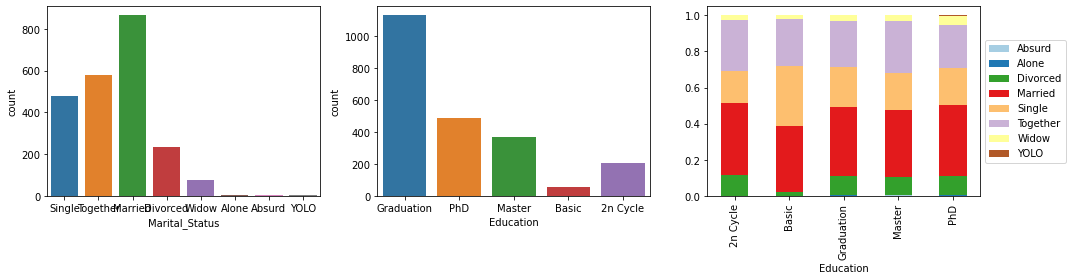

In [3]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(raw_ifood_df['Marital_Status'], ax=ax[0])
sns.countplot(raw_ifood_df['Education'], ax=ax[1])
df_plot = raw_ifood_df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
fig.show()

In [4]:
df_plot

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,23.0,81.0,37.0,57.0,5.0,NaN
Basic,NaN,NaN,1.0,20.0,18.0,14.0,1.0,NaN
Graduation,1.0,1.0,119.0,433.0,252.0,286.0,35.0,NaN
Master,1.0,1.0,37.0,138.0,75.0,106.0,12.0,NaN
PhD,NaN,1.0,52.0,192.0,98.0,117.0,24.0,2.0


In [5]:
# Create Customer Age Column
raw_ifood_df['Age'] = date.today().year - raw_ifood_df['Year_Birth']

# Number of days as a customer
raw_ifood_df['Customer_Days'] = (pd.to_datetime("now") - pd.to_datetime(raw_ifood_df['Dt_Customer'])) // np.timedelta64(1,'D')  

# Marital -> multiples using Dummy Variables
raw_ifood_df.loc[raw_ifood_df['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
dummy_mari_var_aux = pd.get_dummies(raw_ifood_df['Marital_Status'], prefix='marital')
ifood_df = pd.concat([raw_ifood_df,dummy_mari_var_aux],axis=1)

# Replace Educational to an ordinal number
dummy_edu_var_aux = pd.get_dummies(raw_ifood_df['Education'], prefix='education')
ifood_df = pd.concat([ifood_df, dummy_edu_var_aux], axis=1)

# Drop unused columns
ifood_df.drop(columns=['ID','Marital_Status','Education','Year_Birth','Dt_Customer'], inplace=True)

# Look of the new dataset
customer_columns = ['Age', 'Customer_Days', 'Income', 'Kidhome', 'Teenhome'] + dummy_mari_var_aux.columns.to_list() + dummy_edu_var_aux.columns.to_list()

customer_ifood_df = ifood_df[customer_columns]
customer_ifood_df.head()

D:\Anaconda\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,Age,Customer_Days,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
0,67,4168,58138.0,0,0,0,0,1,0,0,0,0,1,0,0
1,70,3618,46344.0,1,1,0,0,1,0,0,0,0,1,0,0
2,59,3817,71613.0,0,0,0,0,0,1,0,0,0,1,0,0
3,40,3644,26646.0,1,0,0,0,0,1,0,0,0,1,0,0
4,43,3666,58293.0,1,0,0,1,0,0,0,0,0,0,0,1


In [6]:
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD'],
      dtype='object')

In [7]:
# Sum of purchases
ifood_df['MntTotal'] = ifood_df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

# Regular Products
ifood_df['MntRegularProds'] = ifood_df.loc[:,'MntTotal'] - ifood_df.loc[:,'MntGoldProds']

# Campaigns Accepted
ifood_df['AcceptedCmpOverall'] = ifood_df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

customer_columns_ext = customer_columns + ['MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall']

customer_ifood_df = ifood_df[customer_columns_ext]
customer_ifood_df.head()

,Age,Customer_Days,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,MntGoldProds,AcceptedCmpOverall
0,67,4168,58138.0,0,0,0,0,1,0,0,0,0,1,0,0,1529,1441,88,0
1,70,3618,46344.0,1,1,0,0,1,0,0,0,0,1,0,0,21,15,6,0
2,59,3817,71613.0,0,0,0,0,0,1,0,0,0,1,0,0,734,692,42,0
3,40,3644,26646.0,1,0,0,0,0,1,0,0,0,1,0,0,48,43,5,0
4,43,3666,58293.0,1,0,0,1,0,0,0,0,0,0,0,1,407,392,15,0


In [37]:
ifood_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Customer_Days'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'MntTotal'}>],
       [<AxesSubplot:title={'center':'MntRegularProds'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'AcceptedCmpOverall'}>]],
      dtype=object)

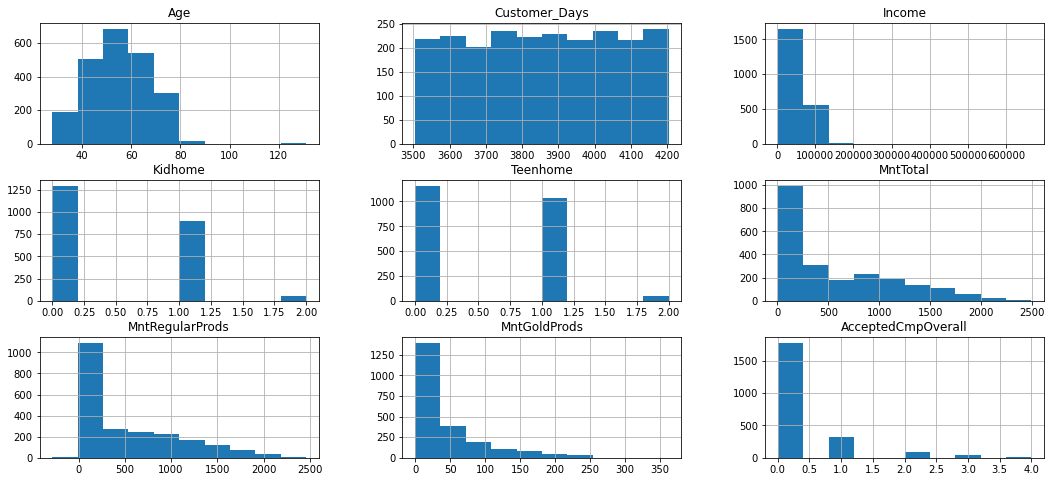

In [9]:
customer_ifood_df.hist( column = ['Age', 'Customer_Days', 'Income', 'Kidhome', 'Teenhome', 'MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall'], figsize=(18,8))


<AxesSubplot:>

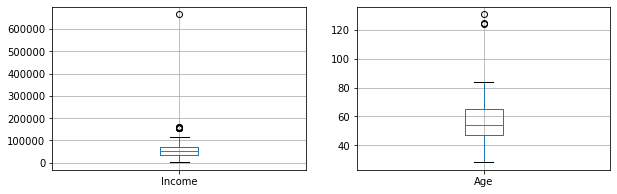

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

customer_ifood_df.boxplot(column=['Income'], ax=ax[0])
customer_ifood_df.boxplot(column=['Age'], ax=ax[1])

In [11]:
len(ifood_df) - len(ifood_df.dropna())

24

In [39]:
ifood_df = ifood_df.dropna()


In [13]:
Q1 = ifood_df.Income.quantile(0.25)
Q3 = ifood_df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = ifood_df[ifood_df.Income > Q3 + 1.5*IQR]
ifood_df = ifood_df[ifood_df.Income < Q3 + 1.5*IQR]
Income_outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
164,157243.0,0,1,98,20,2,1582,1,2,1,...,0,0,0,0,0,0,1,1607,1606,0
617,162397.0,1,1,31,85,1,16,2,1,2,...,1,0,0,0,0,0,1,105,103,0
655,153924.0,0,0,81,1,1,1,1,1,1,...,0,0,0,0,1,0,0,5,4,0
687,160803.0,0,0,21,55,16,1622,17,3,4,...,0,0,0,0,0,0,1,1713,1709,0
1300,157733.0,1,0,37,39,1,9,2,0,8,...,1,0,0,0,0,1,0,51,43,0


In [14]:
Q1 = ifood_df.Age.quantile(0.25)
Q3 = ifood_df.Age.quantile(0.75)
IQR = Q3 - Q1

Age_outliers = ifood_df[ifood_df.Age > Q3 + 1.5*IQR]
ifood_df = ifood_df[ifood_df.Age < Q3 + 1.5*IQR]
Age_outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
192,36640.0,1,0,99,15,6,8,7,4,25,...,0,0,1,0,0,0,0,40,15,0
239,60182.0,0,1,23,8,0,5,7,0,2,...,0,0,1,0,0,0,0,20,18,0
339,83532.0,0,0,36,755,144,562,104,64,224,...,1,0,0,0,0,0,1,1629,1405,1


In [15]:
corr = ifood_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1).corr(method='spearman')
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)

C:\Users\abhij\AppData\Local\Temp\ipykernel_17552\3857674528.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))


C:\Users\abhij\AppData\Local\Temp\ipykernel_17552\3999928030.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

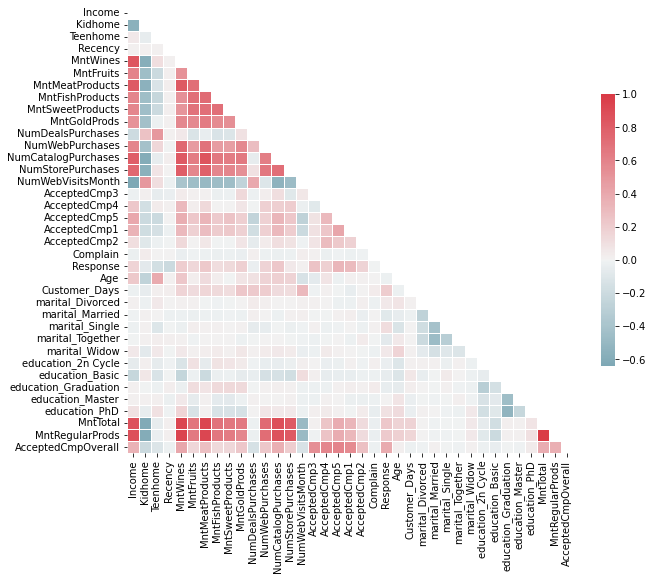

In [16]:
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
pd.DataFrame(corr_unstacked[(abs(corr_unstacked)>0.8)&(abs(corr_unstacked)<1)]).sort_index().style.background_gradient(cmap='coolwarm', low=.5, high=-.7)


In [18]:
pd.DataFrame(corr_unstacked[corr_unstacked<-.5]).sort_index().style.background_gradient(cmap='coolwarm', low=-.6, high=.5)


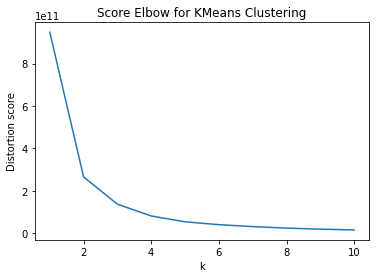

In [19]:
ifood_df_clustering = ifood_df.drop(['Z_CostContact','Z_Revenue','Response'], axis=1)
km_eval = []

for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(ifood_df_clustering)
    km_eval.append(kmeans_model.inertia_)

# Plot Kmeans for k from 1 to 10 criterion
plt.plot(range(1,11), km_eval)
plt.title('Score Elbow for KMeans Clustering')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.show()

In [20]:
# Initialize KMeans model
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model and predict clusters
ifood_df_clustering['cluster'] = kmeans_model.fit_predict(ifood_df_clustering)


In [21]:
ifood_df_clustering.cluster.value_counts()

2    761
0    730
1    714
Name: cluster, dtype: int64

C:\Users\abhij\AppData\Local\Temp\ipykernel_17552\3380789476.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  ifood_df_clustering.boxplot(column=['Income', 'Age', 'Recency', 'MntWines',


array([<AxesSubplot:title={'center':'Income'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'Age'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'Recency'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'MntWines'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'MntFruits'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'MntMeatProducts'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'MntFishProducts'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'MntSweetProducts'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'MntRegularProds'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'MntGoldProds'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'NumDealsPurchases'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'NumWebPurchases'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'NumCatalogPurchases'}, xlabel='cluster'>,
       <AxesSubplot:title={'center':'NumStorePurchases'}, xlabe

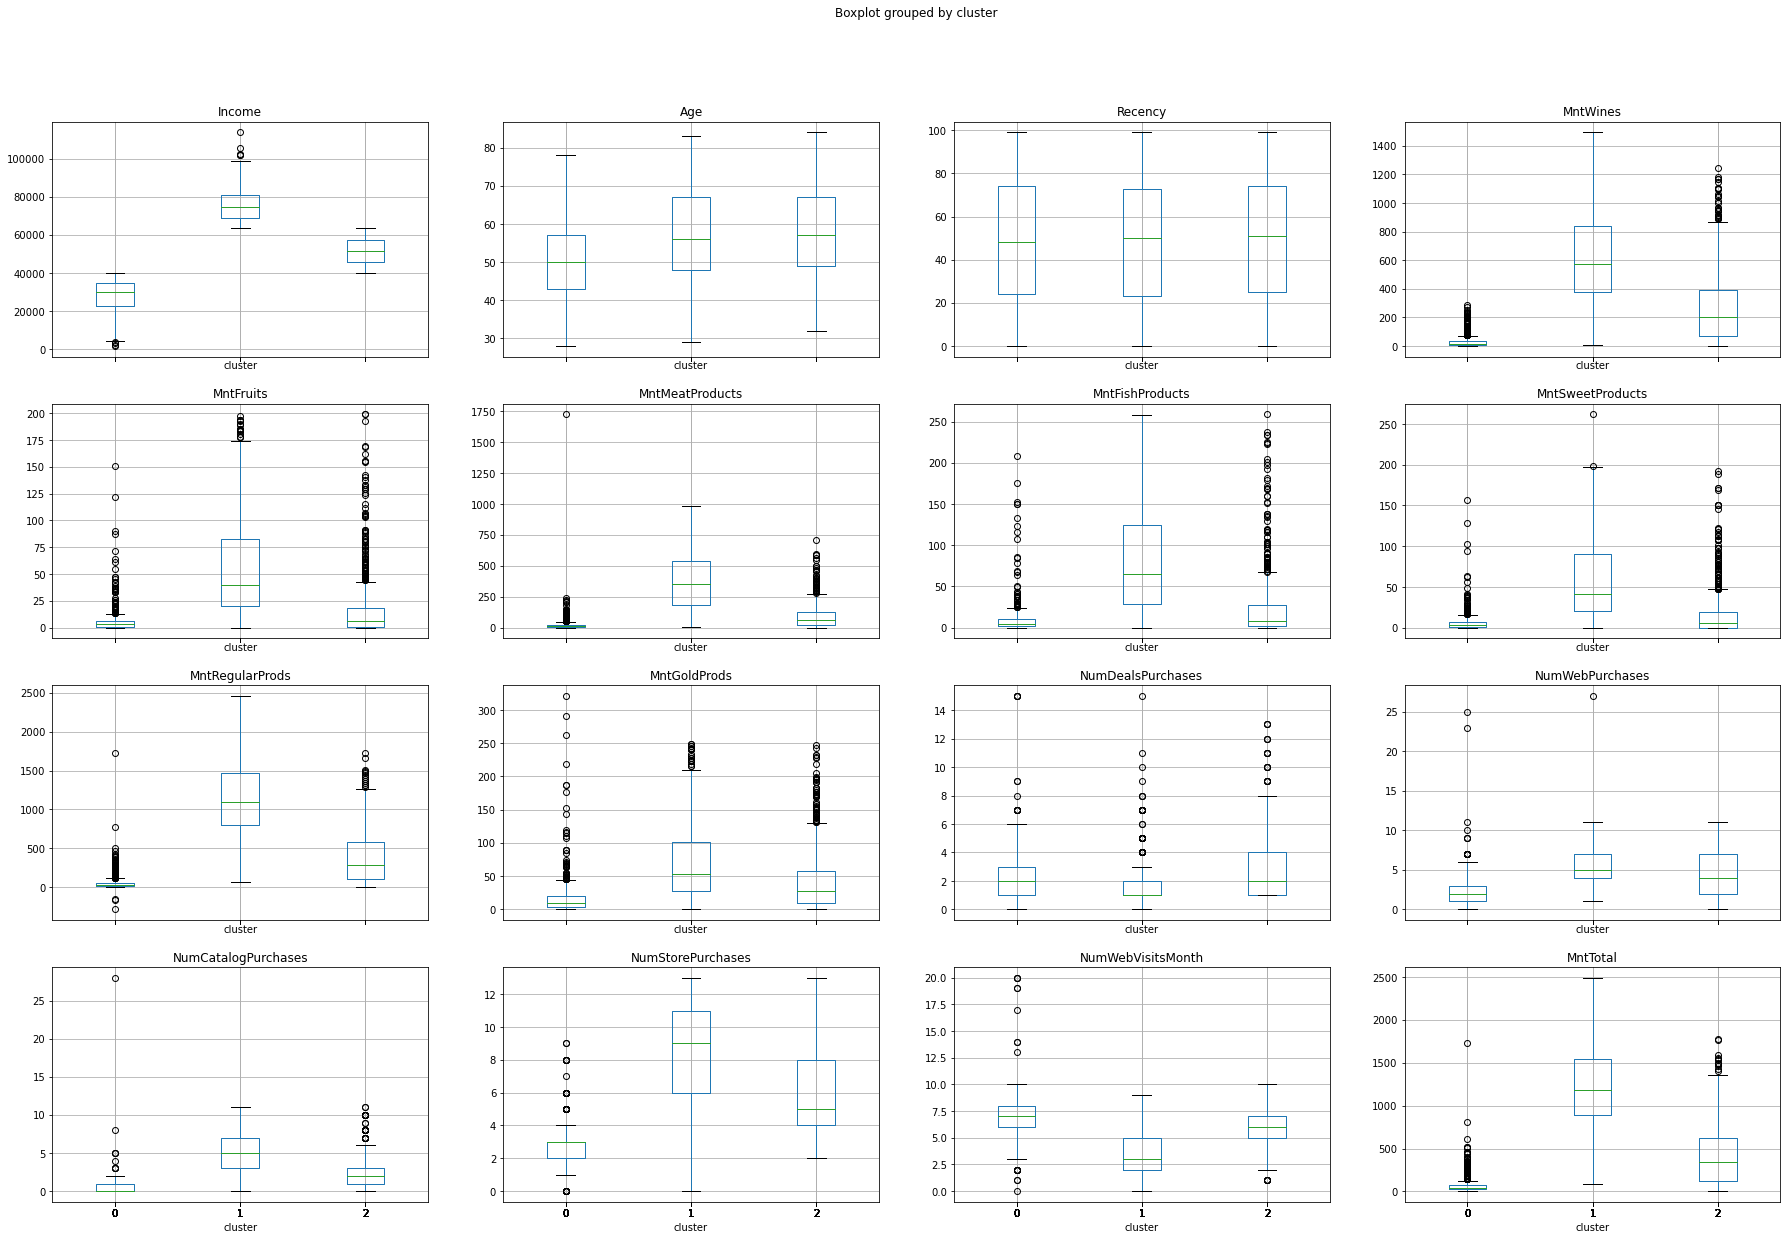

In [22]:
fig, axes = plt.subplots(4,4, sharex= True, sharey= False, figsize=(30,20))

ifood_df_clustering.boxplot(column=['Income', 'Age', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntRegularProds','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntTotal'
       ], ax = axes, by='cluster')

<AxesSubplot:xlabel='cluster', ylabel='count'>

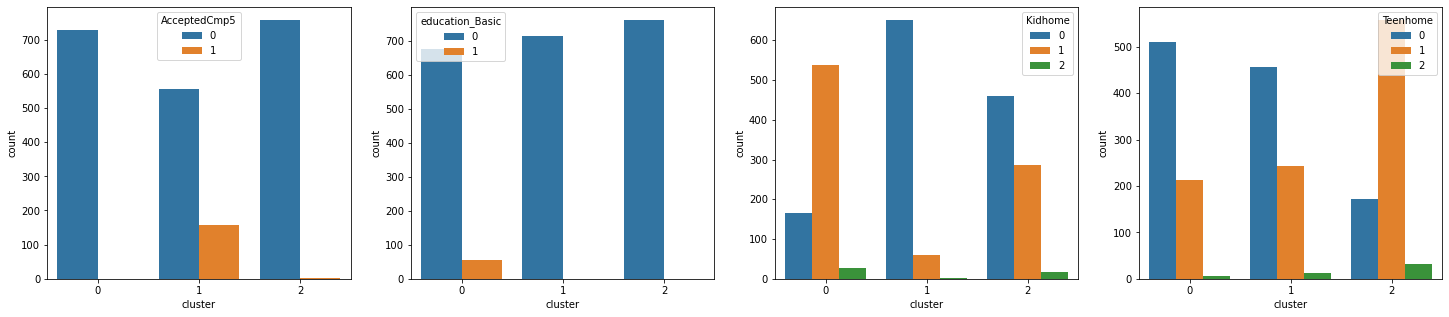

In [23]:
fig, ax = plt.subplots(1,4, figsize=(25,5))

sns.countplot(x="cluster", hue="AcceptedCmp5", data=ifood_df_clustering, ax=ax[0])
sns.countplot(x="cluster", hue="education_Basic", data=ifood_df_clustering, ax=ax[1])
sns.countplot(x="cluster", hue="Kidhome", data=ifood_df_clustering, ax=ax[2])
sns.countplot(x="cluster", hue="Teenhome", data=ifood_df_clustering, ax=ax[3])

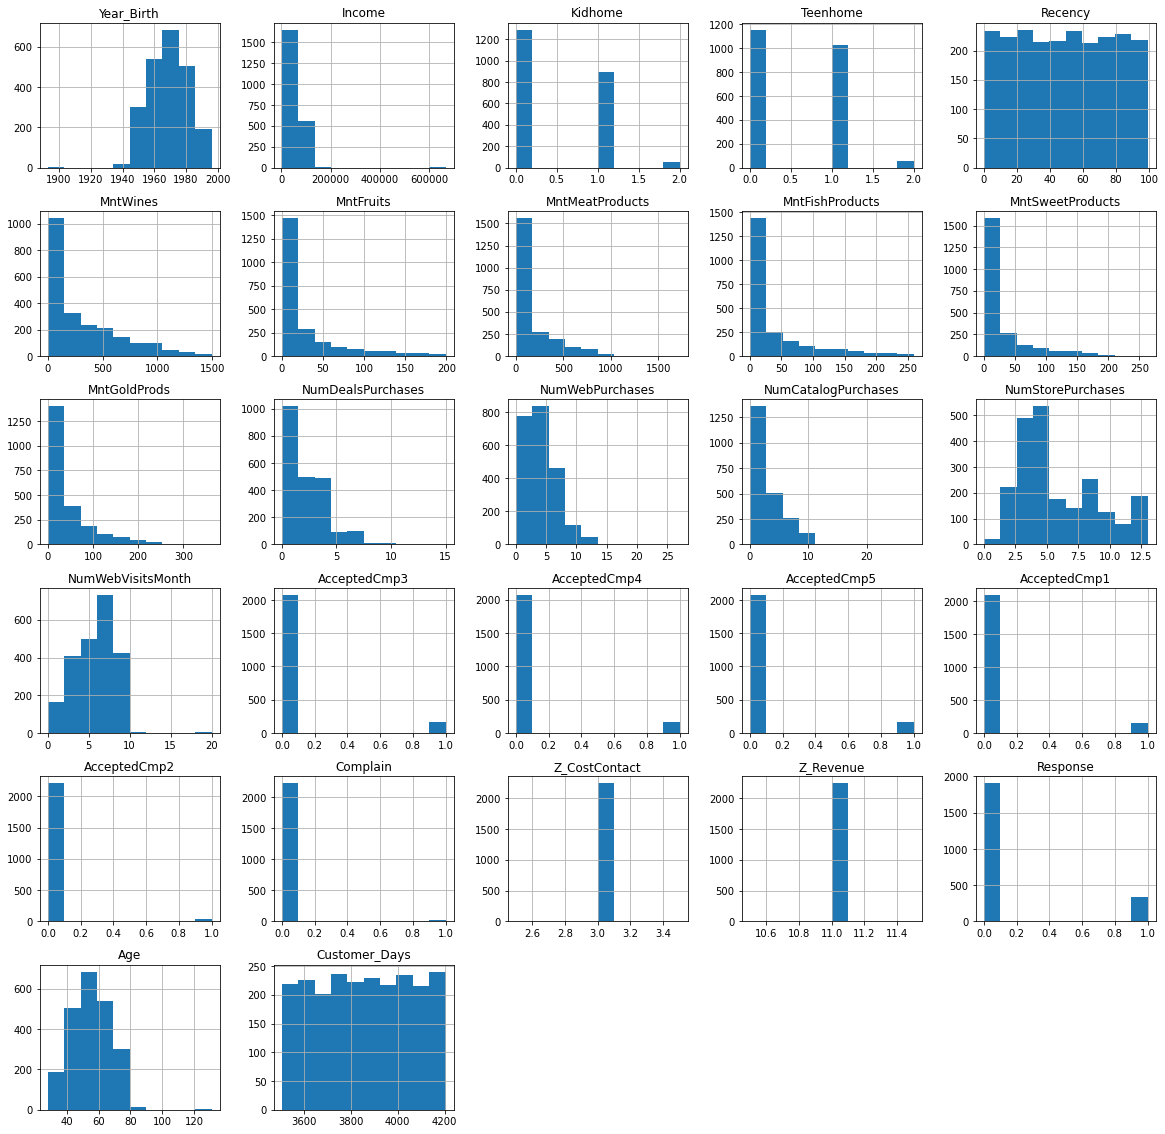

In [24]:
# Drop 'ID' column
df_without_id = raw_ifood_df.drop(['ID'], axis=1)

# Create histograms
df_without_id.hist(figsize=(20,20))
plt.show()



In [25]:
ifood_df.to_csv('ifood_df.csv', index=False)

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [27]:
# Read Dataset
ifood_df = pd.read_csv('ifood_df.csv')

# Split dataset into features and labels
features = ifood_df.drop('Response', axis =1)
labels = ifood_df.Response

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state = 5)

In [28]:
# Using Grid Search to find the best parameters
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto'],
    'max_depth' : [None,3,5,8],
    'criterion' :['gini'],
    'min_samples_split':[2,3,4]
}

# Training RF Models with K-Fold of 5 
rf_models = GridSearchCV(RandomForestClassifier(random_state = 5), param_grid=param_grid, cv=5, verbose=1)
rf_models.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini'], 'max_depth': [None, 3, 5, 8],
                         'max_features': ['auto'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [29]:
# Get the predictions
predictions = rf_models.predict(X_test)

# Print the Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(predictions, y_test))

Accuracy: 0.8707482993197279


In [30]:
feature_importance = pd.DataFrame(data={"features":X_test.columns, "importance":rf_models.best_estimator_.feature_importances_*100})
feature_importance.sort_values('importance', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)


,features,importance
3,Recency,8.475428
37,AcceptedCmpOverall,8.151117
24,Customer_Days,7.842309
0,Income,5.412607
35,MntTotal,5.098285
4,MntWines,4.935032
36,MntRegularProds,4.713860
6,MntMeatProducts,4.602892
18,AcceptedCmp1,4.353262
23,Age,4.002047
